In [15]:
import pandas as pd

In [16]:
evaluation_dataset_path_1 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-21_18-31-20/evaluation_dataset.json"
df_eval_1 = pd.read_json(evaluation_dataset_path_1)
df_eval_1["experiment_name"] = "baseline_v1.0_gemini-2.0-flash"


evaluation_dataset_path_2 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_00-01-22/evaluation_dataset.json"
df_eval_2 = pd.read_json(evaluation_dataset_path_2)
df_eval_2["experiment_name"] = "sparql_construction_v1.1_gemini-2.0-flash"

evaluation_dataset_path_3 = "/Users/sebastian/Documents/Bachelor Thesis/sparql-rag-agent/sparql-rag-agent/experiments/experiments_official/ev_2025-04-22_02-04-22/evaluation_dataset.json"
df_eval_3 = pd.read_json(evaluation_dataset_path_3)
df_eval_3["experiment_name"] = "baseline_v1.1_gemini-2.5-flash"


In [21]:
combined_df = pd.concat([df_eval_1, df_eval_2, df_eval_3], ignore_index=True)

In [22]:
valid_counts = (
    combined_df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .reset_index()
            .sort_values("experiment_name")
)

print(valid_counts)

                             experiment_name  total  n_valid
0             baseline_v1.0_gemini-2.0-flash     32        0
1             baseline_v1.1_gemini-2.5-flash     32       24
2  sparql_construction_v1.1_gemini-2.0-flash     32       18


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/1665541067.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experiment_name", y="n_valid", data=valid_counts, palette="Blues_d")


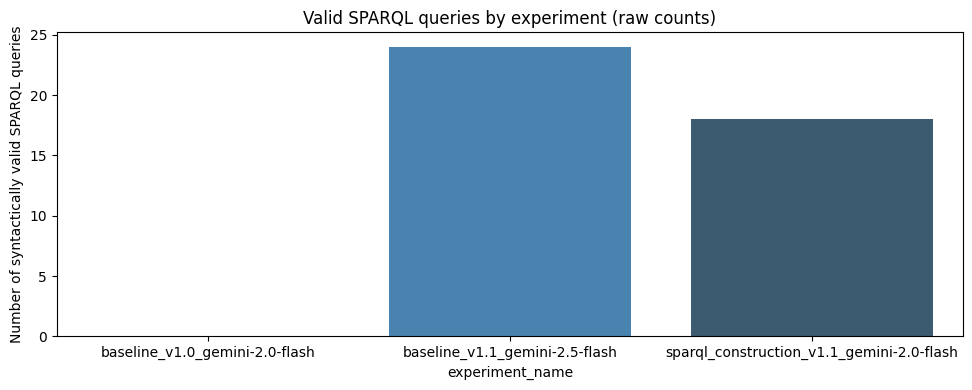

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))
sns.barplot(x="experiment_name", y="n_valid", data=valid_counts, palette="Blues_d")
plt.ylabel("Number of syntactically valid SPARQL queries")
plt.title("Valid SPARQL queries by experiment (raw counts)")
plt.tight_layout()
plt.show()

In [24]:
valid_summary = (
    combined_df.groupby("experiment_name")["is_valid_sparql"]
            .agg(total="size", n_valid="sum")
            .assign(syntactically_valid=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("experiment_name")
)

print(valid_summary)

                             experiment_name  total  n_valid  \
0             baseline_v1.0_gemini-2.0-flash     32        0   
1             baseline_v1.1_gemini-2.5-flash     32       24   
2  sparql_construction_v1.1_gemini-2.0-flash     32       18   

   syntactically_valid  
0                 0.00  
1                75.00  
2                56.25  


/var/folders/cf/q7bl9m0529ncggwfh1ml6k5m0000gn/T/ipykernel_64354/3280994526.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="experiment_name", y="error_occured_at_endpoint", data=valid_summary, palette="Blues_d")


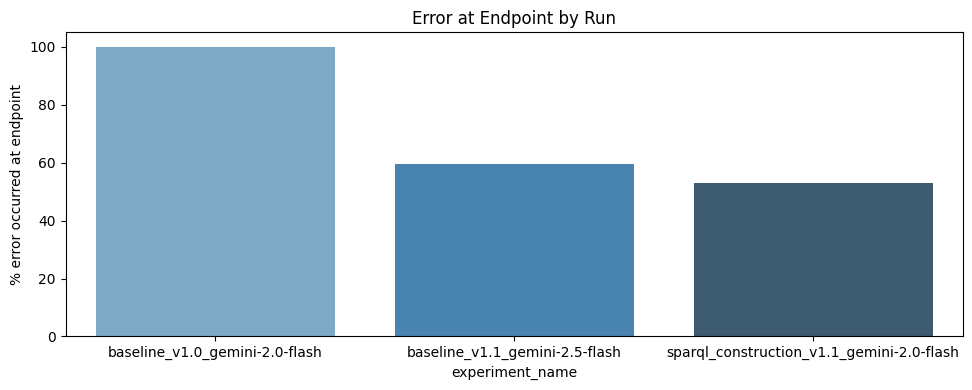

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x="experiment_name", y="error_occured_at_endpoint", data=valid_summary, palette="Blues_d")
plt.ylabel("% error occurred at endpoint")
plt.title("Error at Endpoint by Run")
plt.tight_layout()
plt.show()

In [29]:
valid_summary = (
    combined_df.groupby("experiment_name")["error_occured_at_endpoint"]
            .agg(total="size", n_valid="sum")
            .assign(error_occured_at_endpoint=lambda x: 100 * x.n_valid / x.total)
            .reset_index()
            .sort_values("experiment_name")
)

print(valid_summary)

                             experiment_name  total  n_valid  \
0             baseline_v1.0_gemini-2.0-flash     32       32   
1             baseline_v1.1_gemini-2.5-flash     32       19   
2  sparql_construction_v1.1_gemini-2.0-flash     32       17   

   error_occured_at_endpoint  
0                    100.000  
1                     59.375  
2                     53.125  
